Importando librerias de Qiskit: para los Vectores de BELL

In [1]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit

Un ejemplo de como construir con Operadores básicos:
El 1er estado de Bell: |Φ+⟩

Circuito para el 1er estado de Bell, |Φ+⟩


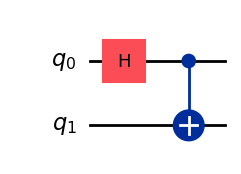

Notación Dirac, para el 1er estado de Bell, |Φ+⟩


<IPython.core.display.Latex object>

In [2]:
circuit = QuantumCircuit(2)
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo
print("Circuito para el 1er estado de Bell, |Φ+⟩"); display(circuit.draw("mpl"))

phiPLUS = Statevector(circuit)
print("Notación Dirac, para el 1er estado de Bell, |Φ+⟩"); display(phiPLUS.draw("latex"))



El 2do estado de Bell: |Φ-⟩

Circuito para el 2do estado de Bell, |Φ-⟩


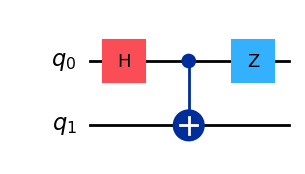

Notación Dirac, para el 2do estado de Bell, |Φ-⟩


<IPython.core.display.Latex object>

In [3]:
circuit = QuantumCircuit(2)
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo
circuit.z(0)      # Operador Paulli Z, para el 1er qubit 0 e introducir el signo "-"
print("Circuito para el 2do estado de Bell, |Φ-⟩"); display(circuit.draw("mpl"))

phiMINUS = Statevector(circuit)
print("Notación Dirac, para el 2do estado de Bell, |Φ-⟩"); display(phiMINUS.draw("latex"))

El 3er estado de Bell: |Ψ+⟩

Circuito para el 3er estado de Bell, |Ψ+⟩


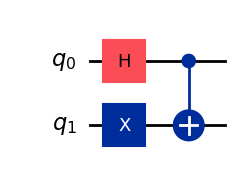

Notación Dirac, para el 3er estado de Bell, |Ψ+⟩


<IPython.core.display.Latex object>

In [4]:
circuit = QuantumCircuit(2)
circuit.x(1)      # Operador Paulli X, con el segundo qubit 1, para cambiar a |01⟩
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo
# circuit.z(0)      # Operador Paulli Z, para el 1er qubit 0 e introducir el signo "-"
print("Circuito para el 3er estado de Bell, |Ψ+⟩"); display(circuit.draw("mpl"))

psiPLUS = Statevector(circuit)
print("Notación Dirac, para el 3er estado de Bell, |Ψ+⟩"); display(psiPLUS.draw("latex"))

El 4to estado de Bell: |Ψ-⟩

Circuito para el 4to estado de Bell, |Ψ-⟩


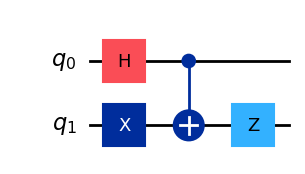

Notación Dirac, para el 4to estado de Bell, |Ψ-⟩


<IPython.core.display.Latex object>

In [5]:
circuit = QuantumCircuit(2)
circuit.x(1)      # Operador Paulli X, con el segundo qubit 1, para cambiar a |01⟩
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo
circuit.z(1)      # Operador Paulli Z, para el 2do qubit 1 e introducir el signo "-"
print("Circuito para el 4to estado de Bell, |Ψ-⟩"); display(circuit.draw("mpl"))

psiMINUS = Statevector(circuit)
print("Notación Dirac, para el 4to estado de Bell, |Ψ-⟩"); display(psiMINUS.draw("latex"))

TELETRANSPORTACION CUANTICA (implementación)
Es un protocolo de comunicación cuántica.

Importando librerias, clases y metodos de Qiskit y Numpy

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

Circuito cuántico del protocolo de Teletransportación:
Alice que tiene un qubit (A) desean comunicar ó teletransportar un qubit (Q) a Bob que tiene un qubit (B)

Cubit inicializado 'Q':


<IPython.core.display.Latex object>

Cubit después de las opereciones sobre Alice 'A':


<IPython.core.display.Latex object>

Circuito de Teletransportación, através de un 'ebit' (bit de entrelazamiento, formado por 02 qubits)


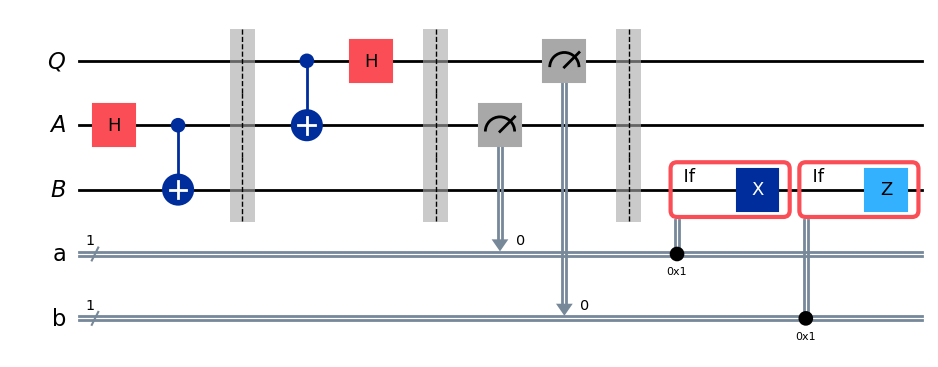

In [7]:
# Se definen: Q (qubit que se desea comunicar), A (qubit de Alice), B (qubit de Bob),
# "a" y "b" (son bits clasicos que se utilizaran para una medición standard de los qubits)
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

# Se inicializa un circuito cuantico
protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Definiendo el "ebit" como el 1er estado de Bell (Inicializando el ebit)
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()
print("Cubit inicializado 'Q':"); 
display(Statevector(protocol).draw("latex"))

# Operaciones con el qubit "Q" que desea comunicar Alice, utilizando su qubit "A"
protocol.cx(qubit, ebit0)   # Aplicando la puerta CNOT
protocol.h(qubit)           # Aplicando la puerta Hadamard
protocol.barrier()
print("Cubit después de las opereciones sobre Alice 'A':"); 
display(Statevector(protocol).draw("latex"))

# Midiendo los qubits y enviando los resultados en los bits "a" y "b" a Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Operaciones con el qubit enviado, ahora en "B" de Bob
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

# Visualizando todo el circuito
print("Circuito de Teletransportación, através de un 'ebit' (bit de entrelazamiento, formado por 02 qubits)" ); 
display(protocol.draw("mpl"))


Probando el circuito de Teletransportación

Puerta qubit unitaria, generada aleatoriamente


<IPython.core.display.Latex object>

Nuevo circuito de Teletransportación, pero incrementando una validación


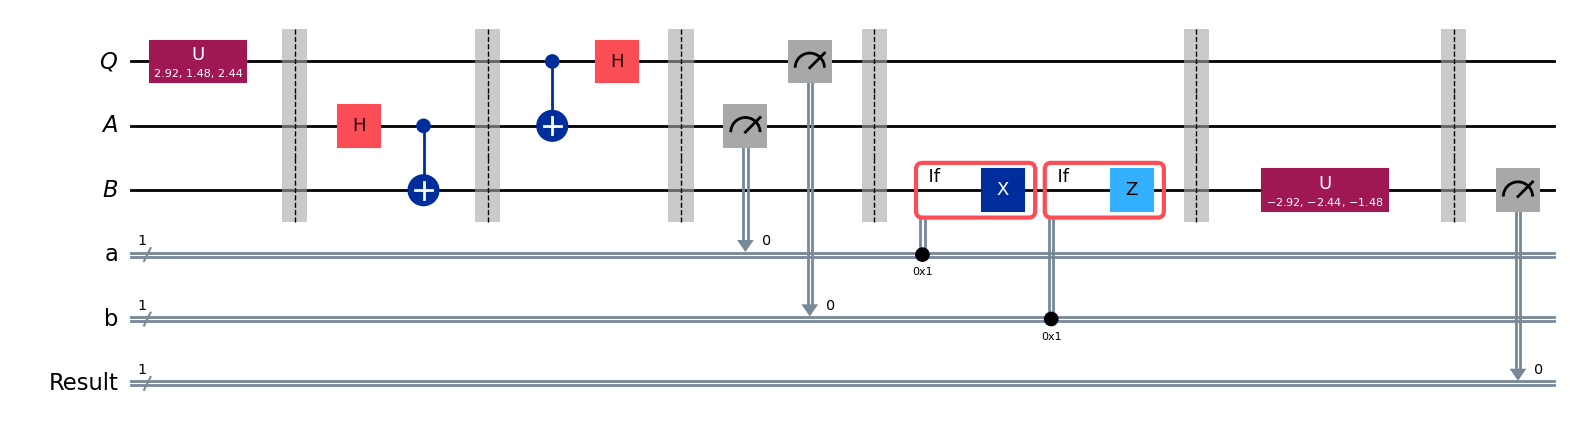

Histograma de los 03 bits de salida clasicos del último Circuito de Teletransportación


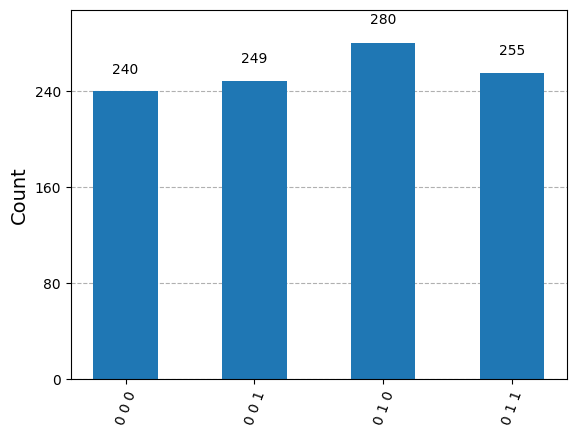

Estadisticas solo del Qubit resultado


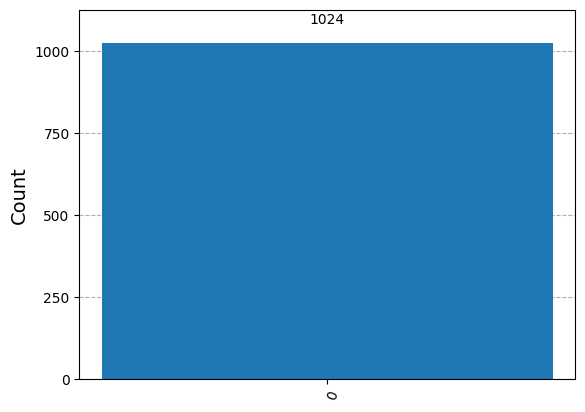

In [8]:
# Primero eligiremos aleatoriamente un puerta qubit unitaria
random_gate = UGate(
    theta=random.random()*2*pi,
    phi=random.random()*2*pi,
    lam=random.random()*2*pi
)
print("Puerta qubit unitaria, generada aleatoriamente"); 
display(array_to_latex(random_gate.to_matrix()))

# Nuevo circuito de simulación, que utiliza los anteriores qubis y bits de "protocol"
test =  QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Se agrega al circuito "test", en el qubit "Q", la puerta qubit unitaria aleatoria
test.append(random_gate, qubit)
test.barrier()

# Se añade a "test" el circuito de teletransportación definido anteriormente "protocol"
test = test.compose(protocol)
test.barrier()

# Se aplica la inversa de la puerta qubit unitaria aleatoria al qubit "B"
test.append(random_gate.inverse(), ebit1)

# Se define un nuevo bit clasico "result" para la medición del qubit "B"
result = ClassicalRegister(1, "Result")

# Se añade el nuevo bit "result" al circuito "test"
test.add_register(result)
test.barrier()

# Se hace la medición del qubit "B" en el bit clasico "result"
test.measure(ebit1, result)
print("Nuevo circuito de Teletransportación, pero incrementando una validación")
display(test.draw(output="mpl"))

# Simulación con "Aer" y trazado de un histograma de mediciones de los 03 bits de salida
resultSimulator = AerSimulator().run(test).result()
statistics = resultSimulator.get_counts()
print("Histograma de los 03 bits de salida clasicos del último Circuito de Teletransportación")
display(plot_histogram(statistics))

# Filtraremso tambien las estadisticas del qubit del resultado de la prueba
filtered_statistics = marginal_distribution(statistics, [2])
print("Estadisticas solo del Qubit resultado")
display(plot_histogram(filtered_statistics))

CODIFICACIÓN SUPERDENSA (Implementación), es un protocolo para transmitir 02 bits clasicos utilizando un qubit de comunicación. Es el complemento ó camino de vuelta de la Teletransportación.

Circuito de Codifición Superdensa


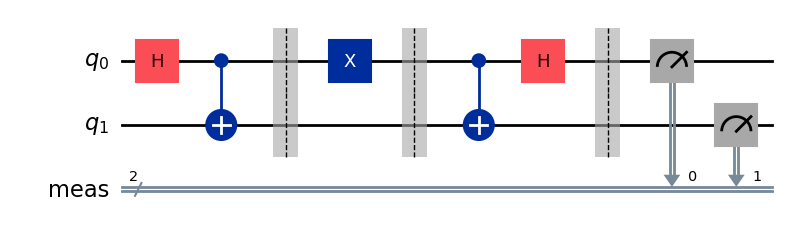

Medida 10 con una frecuencia de 1024
Histograma de la Simulación del circuito de Codificación Superdensa


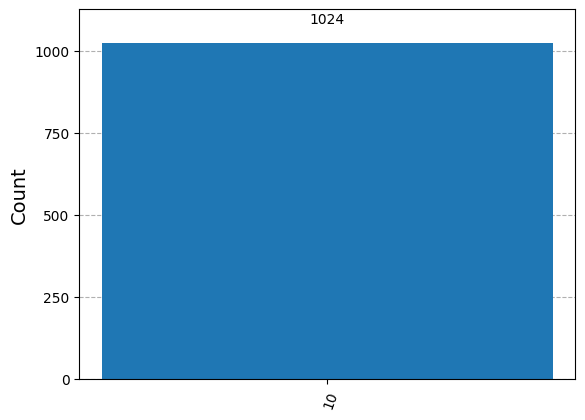

In [9]:
# Se definen los 02 bits clasicos a transmitir
c = "1"
d = "0"

# Se define el circuito cuantico con 02 qubits
protocolSD = QuantumCircuit(2)

# Se inicializa el ebit con el 1er vector de Bell
protocolSD.h(0)      # Puerta Hadamard en el 1er qubit
protocolSD.cx(0 ,1)  # Puerta de Poulli X con el 1er qubit de control y el 2do de objetivo
protocolSD.barrier()

# Operaciones con el 1er qubit, el de Alice
if d == "1": 
    protocolSD.z(0)
if c == "1": 
    protocolSD.x(0)
protocolSD.barrier()

# Operaciones de Bob, para el 1er y 2do quibit
protocolSD.cx(0, 1)
protocolSD.h(0)

# Mediciones de los 02 qubits
protocolSD.measure_all()
print("Circuito de Codifición Superdensa")
display(protocolSD.draw(output="mpl"))

# Aplicando una Simulación con Aer
resultSD = AerSimulator().run(protocolSD).result()
statisticsSD = resultSD.get_counts()
for outcome, frequency in statisticsSD.items():
    print(f"Medida {outcome} con una frecuencia de {frequency}")

print("Histograma de la Simulación del circuito de Codificación Superdensa")
display(plot_histogram(statisticsSD))

Ahora haremos el mismo Circuito de Codificación Superdensa, pero con un qubit adicional para generar los bits "c" y "d" de forma aleatoria

Circuito de Codifición Superdensa con 02 bits aleatorios de Alice


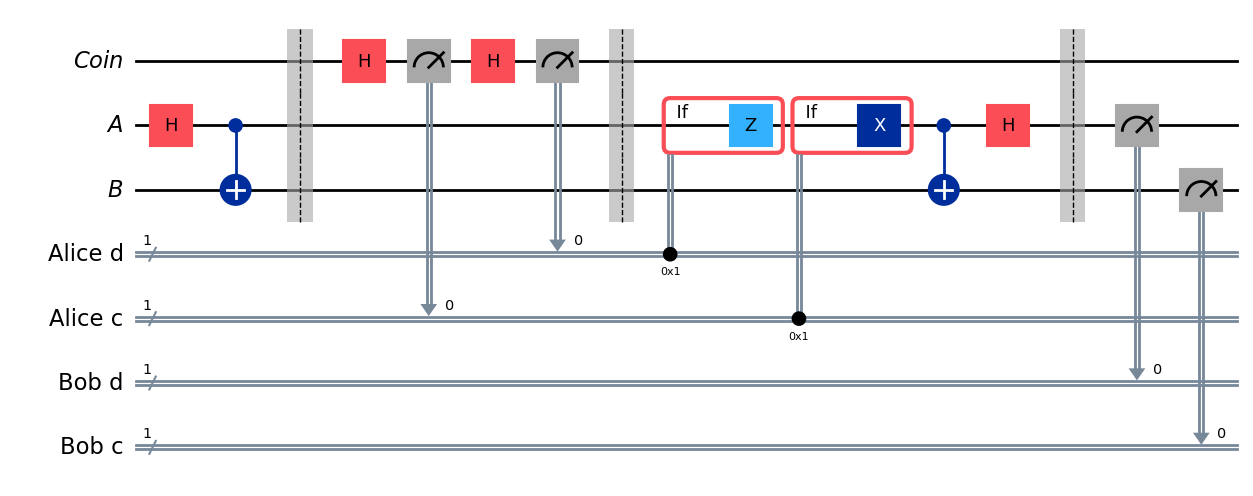

Histograma de la Simulación del circuito de Codificación Superdensa, con bits aleatorios de Alice


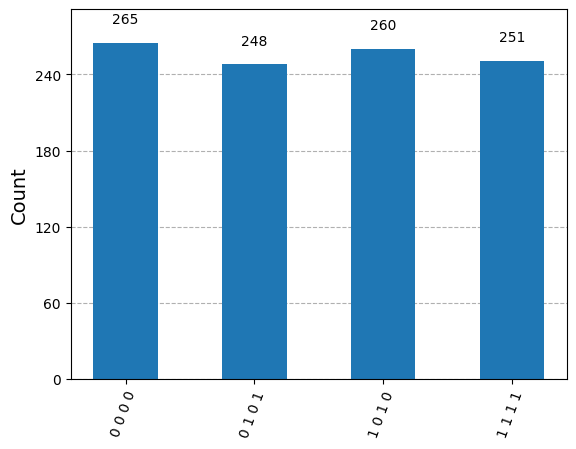

In [10]:
# Definiendo el qubit que generaran los bits aleatorios de entrada
rand_c_d = QuantumRegister(1, "Coin")

# Definiendo el ebit, con el qubit "A" de Alice y el qubit "B" de Bod
ebitSD0 = QuantumRegister(1, "A")
ebitSD1 = QuantumRegister(1, "B")

# Inicializando los bits clasicos de Alice
Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

# Generando el circuito cuantico
testSD = QuantumCircuit(rand_c_d, ebitSD0, ebitSD1, Alice_d, Alice_c)

# Inicializando el ebit con el 1er estado de Bell
testSD.h(ebitSD0)
testSD.cx(ebitSD0, ebitSD1)
testSD.barrier()

# Generando c y d aleatorios con el qubit rand_c_d
testSD.h(rand_c_d)
testSD.measure(rand_c_d, Alice_c)
testSD.h(rand_c_d)
testSD.measure(rand_c_d, Alice_d)
testSD.barrier()

# Aplicamos los nuevos bits aleatorios de Alice al protocolo ó circuito
with testSD.if_test((Alice_d, 1), label="Z"):
    testSD.z(ebitSD0)
with testSD.if_test((Alice_c, 1), label="X"):
    testSD.x(ebitSD0)
test.barrier()

# Acciones de Bob en el ebit
testSD.cx(ebitSD0, ebitSD1)
testSD.h(ebitSD0)
testSD.barrier()

# Inicializando los bits clasicos para Bob
Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")

# Añadiendo los bits de Bob en el circuito
testSD.add_register(Bob_d)
testSD.add_register(Bob_c)

# Midiendo el ebit y enviando los resultados en los bits de Bob
testSD.measure(ebitSD0, Bob_d)
testSD.measure(ebitSD1, Bob_c)
print("Circuito de Codifición Superdensa con 02 bits aleatorios de Alice")
display(testSD.draw(output="mpl"))

# Aplicando una Simulación con Aer
resultSD = AerSimulator().run(testSD).result()
statisticsSD = resultSD.get_counts()

print("Histograma de la Simulación del circuito de Codificación Superdensa, con bits aleatorios de Alice")
display(plot_histogram(statisticsSD))

El Juego CHSH (Implementación): 
Una demostración del Teorema de Bell

Circuito Cuántico de preguta '0' para Alice y pregunta '0' para Bob: (x, y) = (0, 0)


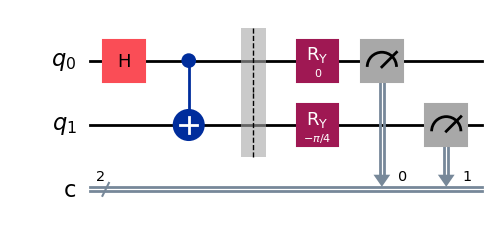

Circuito Cuántico de preguta '0' para Alice y pregunta '1' para Bob: (x, y) = (0, 1)


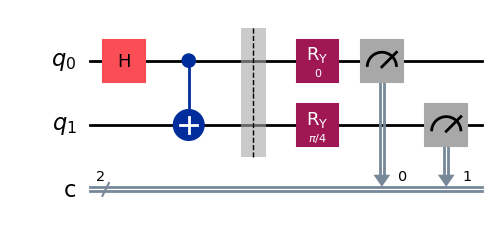

Circuito Cuántico de preguta '1' para Alice y pregunta '0' para Bob: (x, y) = (1, 0)


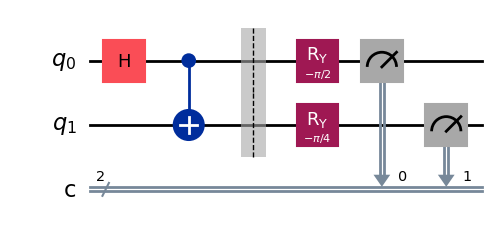

Circuito Cuántico de preguta '1' para Alice y pregunta '1' para Bob: (x, y) = (1, 1)


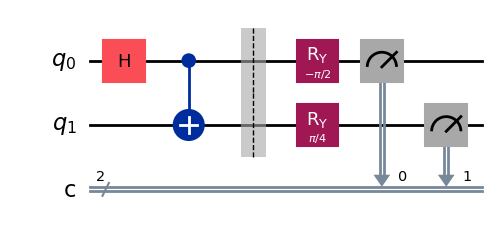

METODO CUANTICO: (bit de entrelazamiento):
- Después de 1,000 juegos de CHSH, se ganó el 84.6% de las veces.
METODO DETERMINISTICO: (una estrategia óptima):
- Después de 1,000 juegos de CHSH, se ganó el 74.2% de las veces.


In [12]:
# Función para ejecutar el juego CHSH, retorna "1" para ganar y "0" si pierde
def chsh_game(strategy):
    # Seleccionar aleatoriamente las preguntas "x" y "y"
    x = random.randint(0 ,2)
    y = random.randint(0, 2)

    # Utilizando la función "strategy" para seleccionar las respuestas "a" y "b"
    a, b = strategy(x, y)

    # Decisión si "strategy" gana o pierde
    if (a != b) == (x & y):
        return 1   # Ganó
    return 0       # Perdió

# Función para generar un circuito cuantico sobre el juego CHSH
def chsh_circuit(x, y):
    # Definiendo el circuito cuanticon con 2 qubits (1 ebit) y 2 bits clasicos
    qc = QuantumCircuit(2, 2)

    # Inicializanodo el ebit con el 1er estado de Bell
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Acciones de Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi/2, 0)
    qc.measure(0, 0)

    # Acciones de Bob
    if y == 0:
        qc.ry(-pi/4, 1)
    else:
        qc.ry(pi/4, 1)
    qc.measure(1, 1)

    # Retornando el circuito resultante
    return qc

# Visualizando los 4 posibles circuitos dependiendo de las preguntas formuladas "x" y "y"
print("Circuito Cuántico de preguta '0' para Alice y pregunta '0' para Bob: (x, y) = (0, 0)")
display(chsh_circuit(0, 0).draw(output="mpl"))
print("Circuito Cuántico de preguta '0' para Alice y pregunta '1' para Bob: (x, y) = (0, 1)")
display(chsh_circuit(0, 1).draw(output="mpl"))
print("Circuito Cuántico de preguta '1' para Alice y pregunta '0' para Bob: (x, y) = (1, 0)")
display(chsh_circuit(1, 0).draw(output="mpl"))
print("Circuito Cuántico de preguta '1' para Alice y pregunta '1' para Bob: (x, y) = (1, 1)")
display(chsh_circuit(1, 1).draw(output="mpl"))

# Función para la Simulación con Aer, para las preguntas (x, y) = (0, 1)
def quantum_strategy(x, y):
    # Inicializando el circuito y configurando "shots=1"
    result = AerSimulator().run(chsh_circuit(x, y), shots=1).result()
    statistics = result.get_counts()
    # Filtrando la salida de los bits del circuito CHSH
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    # Retornando las respuestas de Alice y Bob
    return a, b

# Ahora jugaremos 1,000 veces el juego de CHSH y se calculara el porcentaje de ganados
numGames = 1000
totalScore = 0
for _ in range(numGames):
    totalScore += chsh_game(quantum_strategy)
porcentWin = round(totalScore/1000*100, 2)
print("METODO CUANTICO: (bit de entrelazamiento):")
print(f"- Después de 1,000 juegos de CHSH, se ganó el {porcentWin}% de las veces.")

# -------------------------------------------------------------------------------------
# Finalmente por temas de comparación, implementamos un METODO DETERMINISTICO para CHSH
def classical_strategy(x, y):
    # Respuestas optimas de Alice
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Respuestas optimas de Bob
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    # Retornando las respuestas optimas deterministicas
    return a, b

# De igual forma jugaremos 1,000 veces el juego de CHSH y se calculara el % de ganados
numGamesDet = 1000
totalScoreDet = 0
for _ in range(numGamesDet):
    totalScoreDet += chsh_game(classical_strategy)
porcentWinDet = round(totalScoreDet/1000*100, 2)
print("METODO DETERMINISTICO: (una estrategia óptima):")
print(f"- Después de 1,000 juegos de CHSH, se ganó el {porcentWinDet}% de las veces.")